In [ ]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob
import fnmatch
import os

In [ ]:
var = '[GPP|NPP]'
flux_paths = glob.glob(r'/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_'+var+'*')
flux_paths


['/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC51373.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC46361.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP56385.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC50120.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP47614.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP45108.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP18795.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP57638.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC0.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_SOILORGC61397.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/fore

In [3]:
all_grids = pd.DataFrame( columns = ['lon', 'lat','variable', 'forest_type', 'current_veg', 'stand_age_interval_min',
       'cohort_area', 'land_area', 'value',  'temp', 'value_weight'])


for file in flux_paths:
    grids = pd.read_csv(file)
    
    if (re.search('7518', file)!=None):
    
        grids = grids.loc[~((grids['lat']==46) & (grids['lon']==-94.5))]
    
    print(grids.value.mean())
    print(grids.value.max())

    if len(grids) >0:
        aggregations = {
         'cohort_area':'sum',
         'land_area':'sum',
         'value':'mean',
            'temp':'sum'
        }
        grids['temp'] = grids['value_weight'] * grids['cohort_area'] 

        grids = grids.loc[grids['year'].between(1700, 1800)]
        print( grids.year.min(), ' ', grids.year.max())
        grids = grids.groupby([
               'lon', 'lat', 'variable', 'forest_type', 'current_veg', 'stand_age_interval_min']).agg(
        aggregations
        )


        # all_grids =  all_grids.reset_index()

        grids['value_weight'] = grids['temp']/grids['cohort_area']
        grids = grids.reset_index()

        all_grids = pd.concat([all_grids, grids])
        
        
    print(file)
    print(len(all_grids))
all_grids.to_csv('temp_loop_output_npp_gpp_1700s.csv')    

48.78340614348698
365.65
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_NPP53879.csv
3205
41.34653816941811
397.1566666666667
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_NPP30072.csv
5929
11.008415070952806
279.75
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_NPP41349.csv
8295
100.11608203584377
553.83
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP56385.csv
11091
97.06747104116612
548.2601282051282
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP47614.csv
14434
10.848967142755969
243.485
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_NPP43855.csv
16923
42.3484289125417
500.93964285714287
1700   1800
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP45108.csv
18456
76.60071334477044
503.6115789473684

In [12]:
loop_out = pd.read_csv('temp_loop_output_npp_gpp_1700s.csv')
loop_out = loop_out.loc[loop_out['forest_type'].isin(['Boreal Forest'
         ,'Mixed Temperate Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Temperate Coniferous Forests', 'Temperate Deciduous Forests',
       'Tropical Deciduous Forests', 'Tropical Evergreen Forests',])]

In [13]:
land_cover = loop_out[['lon', 'lat', 'forest_type']].drop_duplicates()

In [14]:
aggregations = {
 'cohort_area':'sum',
 'land_area':'sum',
    'temp':'sum'
}
loop_out['temp'] = loop_out['value_weight'] * loop_out['cohort_area'] 


##make a table for all the pfts
all_grids = loop_out.groupby([
       'lon', 'lat', 'forest_type', 'variable']).agg(
aggregations
)


all_grids =  all_grids.loc[all_grids['cohort_area']>0].reset_index()

all_grids['value_weight'] = all_grids['temp']/all_grids['cohort_area']
all_grids = all_grids.reset_index()

In [ ]:
loop

In [15]:
aggregations = {
 'cohort_area':'sum',
 'land_area':'sum',
    'temp':'sum'
}
loop_out['temp'] = loop_out['value_weight'] * loop_out['cohort_area'] 

##make a table for all the pfts
all_grids = loop_out.groupby([
       'lon', 'lat', 'variable']).agg(
aggregations
)


all_grids =  all_grids.loc[all_grids['cohort_area']>0].reset_index()

all_grids['value_weight'] = all_grids['temp']/all_grids['cohort_area']
all_grids = all_grids.reset_index()


In [6]:
all_grids

,index,lon,lat,variable,cohort_area,land_area,temp,value_weight
0,0,-177.0,-44.0,GPP,245220,32703000,5.528933e+07,225.468291
1,1,-177.0,-44.0,NPP,245220,32703000,2.194821e+07,89.504147
2,2,-176.5,-44.0,GPP,116796,21023928,2.505843e+07,214.548723
3,3,-176.5,-44.0,NPP,116796,21023928,1.026752e+07,87.909873
4,4,-175.5,-21.5,GPP,9660,3165408,1.639403e+06,169.710409
...,...,...,...,...,...,...,...,...
35337,35337,179.0,-16.5,NPP,164004,4048896,1.980273e+07,120.745437
35338,35338,179.5,-17.0,GPP,619032,3026304,1.497806e+08,241.959427
35339,35339,179.5,-17.0,NPP,619032,3026304,7.301705e+07,117.953589
35340,35340,179.5,-16.5,GPP,385176,4191696,9.715275e+07,252.229491


In [16]:
land_cover = geopandas.GeoDataFrame(
    land_cover, geometry=geopandas.points_from_xy(land_cover.lon, land_cover.lat)
    , crs="EPSG:4326"
)
land_cover

,lon,lat,forest_type,geometry
0,119.0,62.5,Boreal Forest,POINT (119.00000 62.50000)
1,119.0,63.0,Boreal Forest,POINT (119.00000 63.00000)
2,119.0,63.5,Boreal Forest,POINT (119.00000 63.50000)
3,119.0,64.0,Boreal Forest,POINT (119.00000 64.00000)
4,119.0,64.5,Boreal Forest,POINT (119.00000 64.50000)
...,...,...,...,...
153732,-70.0,49.0,Boreal Forest,POINT (-70.00000 49.00000)
153733,-70.0,49.5,Boreal Forest,POINT (-70.00000 49.50000)
153734,-70.0,50.0,Boreal Forest,POINT (-70.00000 50.00000)
153735,-70.0,50.5,Boreal Forest,POINT (-70.00000 50.50000)


In [22]:
gpp = all_grids.loc[all_grids['variable']==' NPP ']

gpp = geopandas.GeoDataFrame(
    gpp, geometry=geopandas.points_from_xy(gpp.lon, gpp.lat)
    , crs="EPSG:4326"
)
gpp

,index,lon,lat,variable,cohort_area,land_area,temp,value_weight,geometry
1,1,-177.0,-44.0,NPP,1201092,1201092,9.831561e+07,81.855190,POINT (-177.00000 -44.00000)
3,3,-176.5,-44.0,NPP,899304,900516,7.362638e+07,81.870404,POINT (-176.50000 -44.00000)
5,5,-175.5,-21.5,NPP,164256,1837392,1.475672e+07,89.839770,POINT (-175.50000 -21.50000)
7,7,-166.5,64.5,NPP,1421676,1422888,1.283596e+07,9.028754,POINT (-166.50000 64.50000)
9,9,-166.0,64.5,NPP,1596204,1597416,1.433761e+07,8.982318,POINT (-166.00000 64.50000)
...,...,...,...,...,...,...,...,...,...
35345,35345,179.0,-18.5,NPP,117564,118776,1.076644e+07,91.579431,POINT (179.00000 -18.50000)
35347,35347,179.0,-17.0,NPP,2304084,32646432,2.110347e+08,91.591583,POINT (179.00000 -17.00000)
35349,35349,179.0,-16.5,NPP,1515816,1597416,1.515533e+08,99.981342,POINT (179.00000 -16.50000)
35351,35351,179.5,-17.0,NPP,2055924,2699136,1.885473e+08,91.709291,POINT (179.50000 -17.00000)


In [14]:
gpp

,index,lon,lat,variable,cohort_area,land_area,temp,value_weight
0,0,-177.0,-44.0,GPP,245220,32703000,5.528933e+07,225.468291
2,2,-176.5,-44.0,GPP,116796,21023928,2.505843e+07,214.548723
4,4,-175.5,-21.5,GPP,9660,3165408,1.639403e+06,169.710409
6,6,-166.5,64.5,GPP,436356,436728,1.246413e+07,28.564140
8,8,-166.0,64.5,GPP,489924,490296,1.393468e+07,28.442527
...,...,...,...,...,...,...,...,...
47404,47404,179.0,-18.5,GPP,35016,36456,8.496002e+06,242.632011
47406,47406,179.0,-17.0,GPP,613152,43774848,1.475652e+08,240.666651
47408,47408,179.0,-16.5,GPP,164004,4048896,4.080989e+07,248.834698
47410,47410,179.5,-17.0,GPP,619032,3026304,1.497806e+08,241.959427


In [43]:
land_cover.loc[land_cover['lon']<-25]

,lon,lat,forest_type,geometry
27983,-48.5,-25.5,Tropical Evergreen Forests,POINT (-48.50000 -25.50000)
27986,-48.5,-25.0,Tropical Evergreen Forests,POINT (-48.50000 -25.00000)
27989,-48.5,-24.5,Tropical Evergreen Forests,POINT (-48.50000 -24.50000)
27992,-48.5,-23.5,Tropical Deciduous Forests,POINT (-48.50000 -23.50000)
27994,-48.5,-23.0,Tropical Deciduous Forests,POINT (-48.50000 -23.00000)
...,...,...,...,...
258936,-70.0,56.0,Boreal Woodlands,POINT (-70.00000 56.00000)
258944,-70.0,56.5,Boreal Woodlands,POINT (-70.00000 56.50000)
258945,-70.0,57.0,Boreal Woodlands,POINT (-70.00000 57.00000)
258946,-70.0,57.5,Boreal Woodlands,POINT (-70.00000 57.50000)


In [85]:
land_cover.loc[((land_cover['lon']<-25) &
    ~land_cover['forest_type'].isin(['Forested Boreal Wetlands'
                         ,'Xeromorphic Forests and Woodlands']))].forest_type.unique()

array(['Tropical Evergreen Forests', 'Tropical Deciduous Forests',
       'Tropical Forested Floodplains', 'Boreal Forest',
       'Boreal Woodlands', 'Temperate Deciduous Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Mixed Temperate Forests', 'Temperate Coniferous Forests',
       'Tropical Forested Wetlands', 'Temperate Forested Wetlands',
       'Temperate Forested Floodplains'], dtype=object)

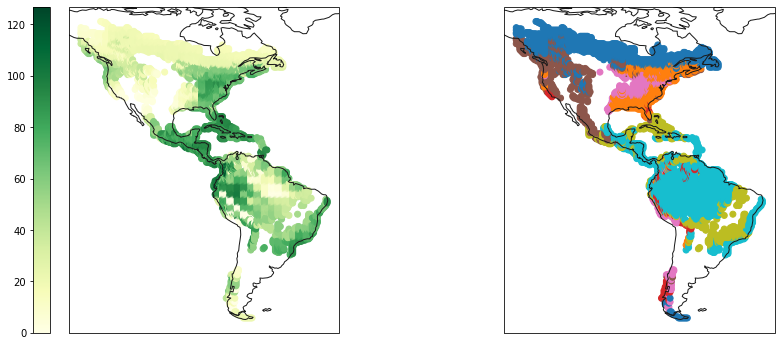

In [23]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 6)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs[0].coastlines(color="0.1")
axs[1].coastlines(color="0.1")


plot0 = gpp.loc[gpp['lon'].between(-135, -25)].plot(ax = axs[0] 
                                         ,cmap = 'YlGn'
                                         , column = 'value_weight', legend = True, 
                                         # vmin = 0, vmax = 200,
                                        legend_kwds={ "location":"left" , "pad":0.05}
                                        )



plot1 = land_cover.loc[(land_cover['lon'].between(-135, -25))].plot(ax = axs[1] 
                                         ,cmap='tab10'
                                         , column = 'forest_type', legend = False,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"center right" }
                                        )

# axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')


In [19]:
# gpp

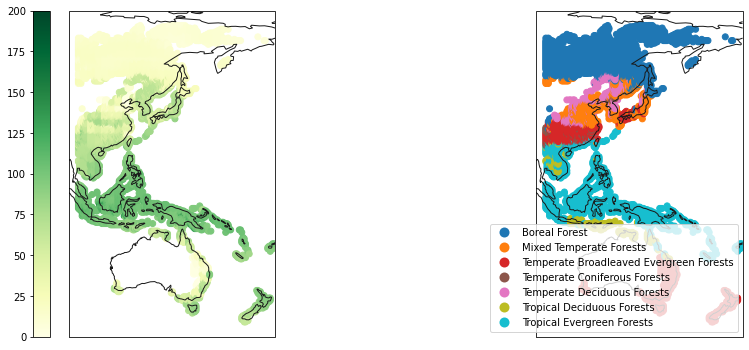

In [25]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 6)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs[0].coastlines(color="0.1")
axs[1].coastlines(color="0.1")


plot0 = gpp.loc[gpp['lon']>100].plot(ax = axs[0] 
                                         ,cmap = 'YlGn'
                                         , column = 'value_weight', legend = True, 
                                         vmin = 0, vmax = 200,
                                     legend_kwds={ "location":"left" , "pad":0.05}
                                        )



plot1 = land_cover.loc[(land_cover['lon']>100)
                      & (~land_cover['forest_type'].isin(['Forested Boreal Wetlands'
                                                         ,'Xeromorphic Forests and Woodlands']))].plot(ax = axs[1] 
                                         ,cmap='tab10'
                                         , column = 'forest_type', legend = True,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"lower " }
                                        )



In [19]:
npp = all_grids.loc[all_grids['variable']==' NPP ']

<Axes: xlabel='lon', ylabel='lat'>

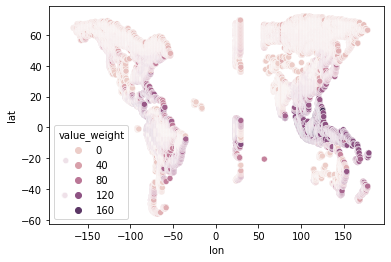

In [20]:
sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = npp)